Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" [посилання](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8)

In [2]:
URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"

In [3]:
import pandas as pd

In [4]:
url_data = pd.read_html(URL, match=TABLE_NAME, thousands="_", decimal=",")
if len(url_data) == 0:
    print("Error: table not found")
    raise ValueError

data = url_data[0]

Вивести перші рядки таблиці за допомогою методу head

In [5]:
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [6]:
data.shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN

In [7]:
data = data.replace({"—": "NaN"})
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [8]:
print(data[data.columns].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [9]:
data[data.columns[1:]] = data[data.columns[1:]].apply(pd.to_numeric, errors="coerce")
print(data[data.columns].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [10]:
data.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [11]:
# data = data[:-1]
# data.drop(data.tail(1).index, inplace=True)
data = data.iloc[:-1]
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [12]:
data = data.fillna(data.mean(numeric_only=True))
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [13]:
median = data["2019"].mean()
median

8.017391304347827

In [14]:
year = '2019'
data[data[year] >= data[year].mean()][["Регіон", year]].sort_values(by=year, ascending=False)

,Регіон,2019
25,Київ,11.000000
16,Рівненська,10.700000
6,Закарпатська,10.400000
2,Волинська,10.100000
23,Чернівецька,9.200000
8,Івано-Франківська,8.800000
14,Одеська,8.800000
12,Львівська,8.700000
20,Херсонська,8.100000
0,Крим,8.017391


У якому регіоні була найвища народжуваність у 2014 році ?

In [15]:
year = '2014'
data.iloc[data[year].idxmax()][["Регіон", year]]

Регіон    Рівненська
2014            14.8
Name: 16, dtype: object

Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

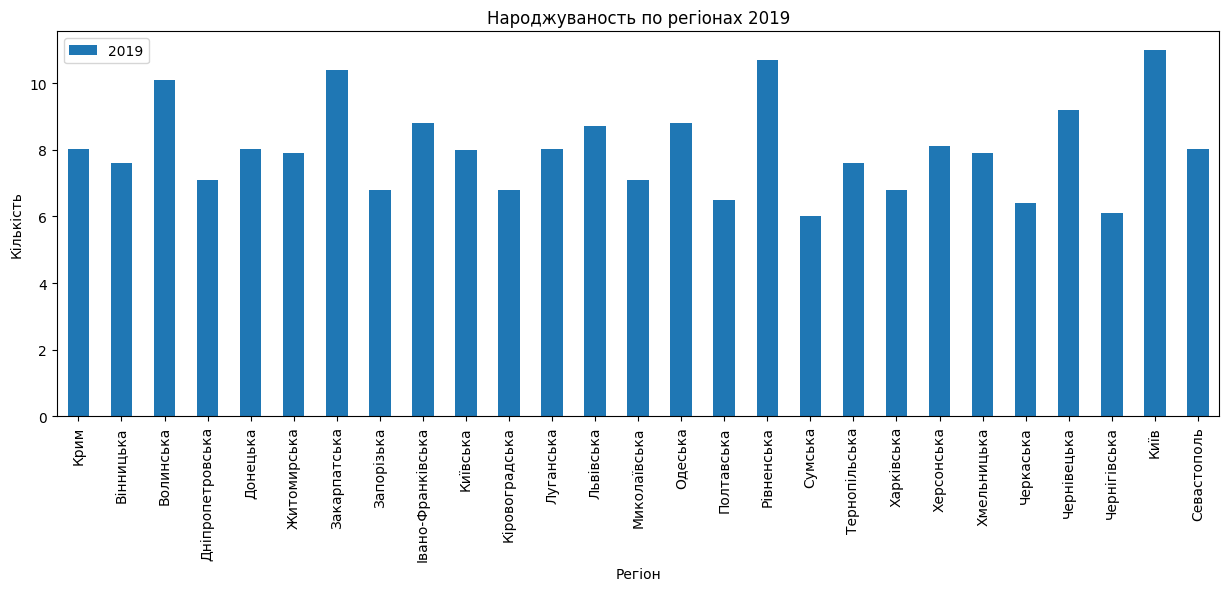

In [16]:
import matplotlib.pyplot as plt

year = '2019'
pl = data[["Регіон", year]].plot.bar(x="Регіон", y=year, ylabel = "Кількість", title = f"Народжуваность по регіонах {year}", figsize=(15, 5))

Графікі

In [17]:
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


1

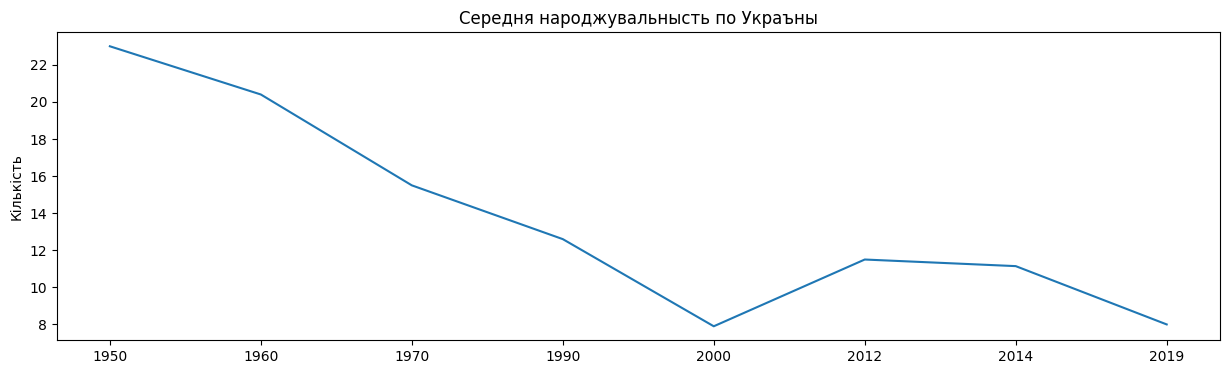

In [18]:
pl = data.median(numeric_only=True).plot(title="Cередня народжувальнысть по України", ylabel="Кількість", figsize=(15,4))

2

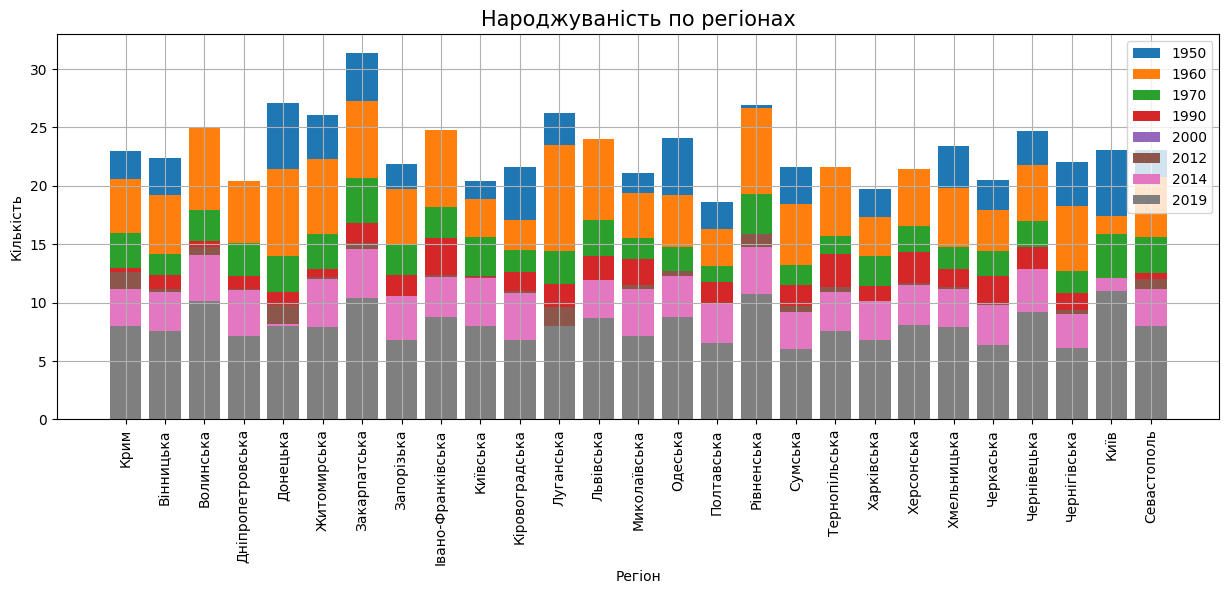

In [19]:
plt.figure(figsize=(15, 5))
for col in data.columns[1:]:
    plt.bar(data["Регіон"], data[col], label=col)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel("Регіон")
plt.ylabel("Кількість")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.grid()
plt.show()

3

<Axes: title={'center': 'Народжуваність по регіонах'}, xlabel='Регіон'>

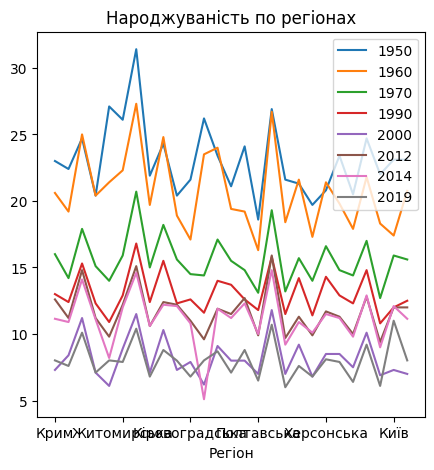

In [20]:
data.plot(x="Регіон", y=data.columns[1:], title="Народжуваність по регіонах", figsize=(15, 5))